In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
customers = pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [ ]:
customers.columns

In [ ]:
customers.isnull().sum()

In [ ]:
customers['Make'].value_counts()

In [ ]:
## Luxury Vehicle Brand- Jaguar,Lexus,Mecedes,BMW,Porche,Ferrari
## Not Luxury Vehicle Brand

In [3]:
def createMake(carMake):
    if carMake=='Jaguar' or carMake=='Lexus' or carMake=='Mecedes' or carMake=='BMW' or carMake=='Porche' or carMake=='Ferrari':
        return 1
    else:
        return 0
customers['Make']=customers['Make'].apply(createMake)
del customers['Make']

In [4]:
##del customers['PolicyNumber']
del customers['Year']

del customers['PolicyType']

In [6]:
def married(status):
    if status=='Married':
        return 1
    else:
        return 0
def single(status):
    if status=='Single':
        return 1
    else:
        return 0
def divorced(status):
    if status=='Divorced':
        return 1
    else:
        return 0
def widow(status):
    if status=='Widow':
        return 1
    else:
        return 0
customers['Married']=customers['MaritalStatus'].apply(married)
customers['Single']=customers['MaritalStatus'].apply(single)
customers['Divorced']=customers['MaritalStatus'].apply(divorced)
customers['Widow']=customers['MaritalStatus'].apply(widow)
del customers['MaritalStatus']

In [7]:
def collision(base):
    if base=='Collision':
        return 1
    else:
        return 0
def liability(base):
    if base=='Liability':
        return 1
    else:
        return 0
def perils(base):
    if base=='All Perils':
        return 1
    else:
        return 0    
customers['Collision']=customers['BasePolicy'].apply(collision)
customers['Liability']=customers['BasePolicy'].apply(liability)
customers['All Perils']=customers['BasePolicy'].apply(perils)
del customers['BasePolicy']

In [8]:
def convertStr(boolean):
    if boolean=='No':
        return 0
    elif boolean=='Yes':
        return 1
customers['PoliceReportFiled']=customers['PoliceReportFiled'].apply(convertStr)  
customers['WitnessPresent']=customers['WitnessPresent'].apply(convertStr) 

In [9]:
def convertAgent(agent):
    if agent=='External':
        return 1
    elif agent=='Internal':
        return 2
customers['AgentType']=customers['AgentType'].apply(convertAgent)     

In [10]:
def convertCar(car):
    if car=='1 vehicle':
        return 1
    elif car=='2 vehicles':
        return 2
    elif car=='3 to 4':
        return 3
    elif car=='5 to 8':
        return 4
    elif car=='more than 8':
        return 5
customers['NumberOfCars']=customers['NumberOfCars'].apply(convertCar)  

In [11]:
def convertAddressChange(address):
    if address=='no change':
        return 0
    elif address=='under 6 months':
        return 1
    elif address=='1 year':
        return 2
    elif address=='2 to 3 years':
        return 3
    elif address=='4 to 8 years':
        return 4
customers['AddressChange_Claim']=customers['AddressChange_Claim'].apply(convertAddressChange)      

In [12]:
def convertSuppliments(suppliment):
    if suppliment=='none':
        return 0
    elif suppliment=='1 to 2':
        return 1
    elif suppliment=='3 to 5':
        return 2
    elif suppliment=='more than 5':
        return 3
customers['NumberOfSuppliments']=customers['NumberOfSuppliments'].apply(convertSuppliments)      

In [13]:
def convertClaims(claim):
    if claim=='none':
        return 0
    elif claim==1:
        return 1
    elif claim=='2 to 4':
        return 2
    elif claim=='more than 4':
        return 3
customers['PastNumberOfClaims']=customers['PastNumberOfClaims'].apply(convertClaims)       

In [14]:
def convertDaysPolicy(number):
    if number=='none':
        return 0
    elif number=='1 to 7':
        return 1
    elif number=='8 to 15':
        return 2
    elif number=='15 to 30':
        return 3
    elif number=='more than 30':
        return 4
customers['Days_Policy_Accident']=customers['Days_Policy_Accident'].apply(convertDaysPolicy)   
customers['Days_Policy_Claim']=customers['Days_Policy_Claim'].apply(convertDaysPolicy)   

In [15]:
def convertFault(fault):
    if fault=='Policy Holder':
        return 0
    elif fault=='Third Party':
        return 1
customers['Fault']=customers['Fault'].apply(convertFault)       

In [16]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [ ]:
display_all(customers.head())

In [17]:
customers.drop(customers.index[[1146]],inplace=True)
X=customers[customers['DriverRating'].isnull()].index
customers.drop(customers.index[[X]],inplace=True)
X=customers[customers['Age'].isnull()].index
customers.drop(customers.index[[X]],inplace=True)

In [18]:
def sport(category):
    if category=='Sport':
        return 1
    else:
        return 0
def sedan(category):
    if category=='Sedan':
        return 1
    else:
        return 0
def utility(category):
    if category=='Utility':
        return 1
    else:
        return 0
customers['Sport']=customers['VehicleCategory'].apply(sport)
customers['Sedan']=customers['VehicleCategory'].apply(sedan)
customers['Utility']=customers['VehicleCategory'].apply(utility)
del customers['VehicleCategory']    

In [19]:
def convertAgeHolder(age):
    if age=='16 to 17':
        return 1
    elif age=='18 to 20':
        return 2
    elif age=='21 to 25':
        return 3
    elif age=='26 to 30':
        return 4
    elif age=='31 to 35':
        return 5
    elif age=='36 to 40':
        return 6
    elif age=='41 to 50':
        return 7
    elif age=='51 to 65':
        return 8
    elif age=='over 65':
        return 9
customers['AgeOfPolicyHolder']=customers['AgeOfPolicyHolder'].apply(convertAgeHolder)     

In [20]:
def convertAgeVehicle(age):
    if age=='new':
        return 1
    elif age=='2 years':
        return 2
    elif age=='3 years':
        return 3
    elif age=='4 years':
        return 4
    elif age=='5 years':
        return 5
    elif age=='6 years':
        return 6
    elif age=='7 years':
        return 7
    elif age=='more than 7':
        return 8
customers['AgeOfVehicle']=customers['AgeOfVehicle'].apply(convertAgeVehicle)        

In [21]:
def convertPrice(price):
    if price=='less than 20000':
        return 0
    elif price=='20000 to 29000':
        return 1
    elif price=='30000 to 39000':
        return 2
    elif price=='40000 to 59000':
        return 3
    elif price=='60000 to 69000':
        return 4
    elif price=='more than 69000':
        return 5
customers['VehiclePrice']=customers['VehiclePrice'].apply(convertPrice)    

In [22]:
def convertMonth(month):
    if month=='Jan':
        return 1
    elif month=='Feb':
        return 2
    elif month=='Mar':
        return 3
    elif month=='Apr':
        return 4
    elif month=='May':
        return 5
    elif month=='Jun':
        return 6
    elif month=='Jul':
        return 7
    elif month=='Aug':
        return 8
    elif month=='Sep':
        return 9
    elif month=='Oct':
        return 10
    elif month=='Nov':
        return 11
    elif month=='Dec':
        return 12
customers['Month']=customers['Month'].apply(convertMonth)
customers['MonthClaimed']=customers['MonthClaimed'].apply(convertMonth)    

In [23]:
def convertDay(day):
    if day=='Monday':
        return 1
    elif day=='Tuesday':
        return 2
    elif day=='Wednesday':
        return 3
    elif day=='Thursday':
        return 4
    elif day=='Friday':
        return 5
    elif day=='Saturday':
        return 6
    elif day=='Sunday':
        return 7
customers['DayOfWeek']=customers['DayOfWeek'].apply(convertDay)
customers['DayOfWeekClaimed']=customers['DayOfWeekClaimed'].apply(convertDay)    

In [24]:
def convertSex(sex):
    if sex=='Male':
        return 0
    elif sex=='Female':
        return 1
customers['Sex']=customers['Sex'].apply(convertSex)    

In [25]:
def convertArea(area):
    if area=='Urban':
        return 0
    elif area=='Rural':
        return 1
customers['AccidentArea']=customers['AccidentArea'].apply(convertArea)     

In [27]:
customers.dropna(inplace=True)

In [ ]:
customers.dropna(inplace=True)
Fraud=customers[customers['FraudFound_P']==1]
NotFraud=customers[customers['FraudFound_P']==0]
Y_fraud=Fraud['FraudFound_P'].values
Y_NotFraud=NotFraud['FraudFound_P'].values
del Fraud['FraudFound_P']
del NotFraud["FraudFound_P"]
del customers['FraudFound_P']

In [ ]:
X_train_fraud,X_test_fraud,Y_train_fraud,Y_test_fraud=train_test_split(Fraud.values,Y_fraud,test_size=0.5)
X_train_Notfraud,X_test_Notfraud,Y_train_Notfraud,Y_test_Notfraud=train_test_split(NotFraud.values,Y_NotFraud,test_size=0.80)

In [ ]:
X_train=np.concatenate([X_train_fraud,X_train_Notfraud])
Y_train=np.concatenate([Y_train_fraud,Y_train_Notfraud])
X_test=np.concatenate([X_test_fraud,X_test_Notfraud])
Y_test=np.concatenate([Y_test_fraud,Y_test_Notfraud])

In [ ]:
df_new=pd.DataFrame(X_train)
df_new.columns=customers.columns
df_new['FraudFound_P']=Y_train
df_new = df_new.sample(frac=1).reset_index(drop=True)
Y_train=df_new['FraudFound_P'].values
del df_new['FraudFound_P']
X_train=df_new.values

In [ ]:
clf=RandomForestClassifier(n_estimators=40,max_features=0.5)
clf.fit(X_train,Y_train)

In [ ]:
Y_pred=clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_pred,Y_test))
print(f1_score(Y_test,Y_pred))

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_train = lgb.Dataset(X_train, Y_train)

In [ ]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train)

In [ ]:
Y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [ ]:
Y_pred[Y_pred>=0.5]=1
Y_pred[Y_pred<0.5]=0

In [ ]:
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_pred,Y_test))
print(f1_score(Y_test,Y_pred))

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fraud=customers.loc[customers["FraudFound_P"]==1]
normal=customers.loc[customers["FraudFound_P"]==0]
sns.distplot(fraud.ClaimSize)
plt.show()

In [ ]:
plt.scatter(customers['ClaimSize'],customers['FraudFound_P'])
plt.xlabel("ClaimSize")
plt.ylabel("Class")
plt.show()

In [ ]:
#Using Spearman Correlation Coefficient to see how much the features are co-related to each other
ax = sns.heatmap(customers.corr(method='spearman'))
plt.show()

In [ ]:
corrmat = customers.corr()
corrmat_orig = customers.corr()
f, ax = plt.subplots(figsize=(16, 8))
plt.title('Correlation matrix of sub-sampled data')
sns.heatmap(corrmat, vmax=1, square=True)

In [ ]:
important_feats = customers.columns[np.abs(corrmat["FraudFound_P"]) > 0.1]
important_feats

In [ ]:
f, ax = plt.subplots(figsize=(24, 32))
for i in range(len(important_feats) - 1):
    plt.subplot(3, 4, i + 1)
    plt.title(important_feats[i])
    sns.boxplot(x='FraudFound_P', y=important_feats[i], data=customers)

In [28]:
from sklearn.manifold import TSNE
from time import time


sample_features = customers
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=40,n_iter=2000)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])



(11543, 37) (11543, 1)
TSNE done in 572.311s.
(11543, 3)


NameError: name 'sns' is not defined

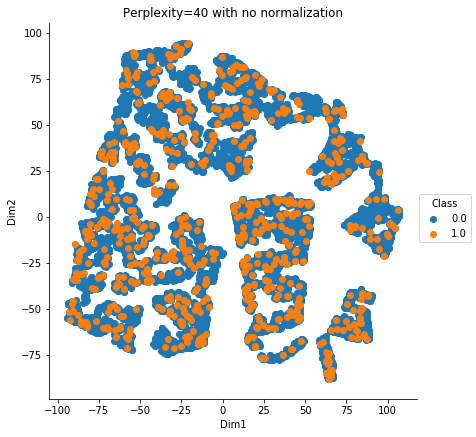

In [30]:
sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=40 with no normalization")
plt.savefig('TSNE Perplexity=40.png')
plt.show()

(11543, 37) (11543, 1)
TSNE done in 282.881s.
(11543, 3)


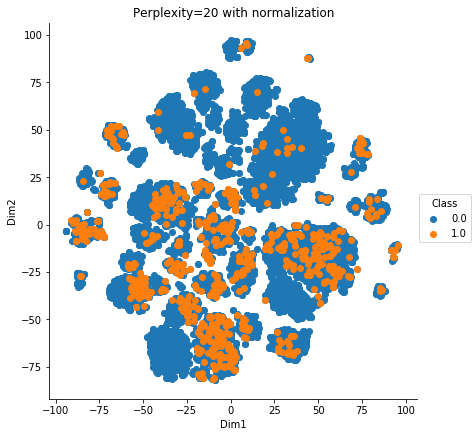

In [31]:
# Using Normalization on sample data
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = customers
# sample_features = df
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=20)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=20 with normalization")
plt.savefig('TSNE Perplexity 20 normalization.png')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = customers
# sample_features = df
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=35)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=35 with normalization")
plt.savefig('TSNE Perplexity 35 normalization.png')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = customers
# sample_features = df
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=50)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=50 with normalization")
plt.savefig('TSNE Perplexity 50 normalization.png')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = customers
# sample_features = df
sample_class = sample_features.FraudFound_P
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('FraudFound_P',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=30)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=30 with normalization")
plt.savefig('TSNE Perplexity 30 normalization.png')
plt.show()